# Tidyverse Examples

# Core Tidy

There are a lot of packages in the Tidyverse. We're only going to focus on Core Tidy.
That includes:
* ggplot2
* dplyr
* tidyr (We're going to skip tidyr)
* readr
* purrr (We're going to skip purrr)
* tibble

Tidyverse website: https://www.tidyverse.org/

Code samples and some text pulled from R For Data Science by Wickham & Grolemund, 2016. ISBN-13: 978-1491910399

In [86]:
library(tidyverse)


In [87]:
#install.packages("nycflights13", repos = "http://cran.us.r-project.org")

Note that filter() and lag() are overwritten by the Tidyverse. If you want to use them you have to acces them with their full name.
* stats::filter()
* stats::lag()

# dplyr For Data Manipulation

Dplyr provides a more natural way to manipulate data vis-à-vis core R.

Five key functions:
* filter()
* arrange()
* select()
* mutate()
* summarize()

All the functions (called verbs in Tidyverse speak) work the same. 

new data_frame = verb(existing_data_frame, action_to_take)

In [88]:
library(nycflights13) #336,776 flights that departed NYC in 2013

In [89]:
?flights

In [90]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [91]:
september_flights = filter(flights, month == 9, distance >= 1000)
head(september_flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,9,1,9,2359,10,343,340,3,B6,839,N663JB,JFK,BQN,196,1576,23,59,2013-09-01 23:00:00
2013,9,1,508,516,-8,717,800,-43,UA,1545,N57869,EWR,IAH,170,1400,5,16,2013-09-01 05:00:00
2013,9,1,537,545,-8,849,855,-6,AA,701,N613AA,JFK,MIA,148,1089,5,45,2013-09-01 05:00:00
2013,9,1,537,545,-8,906,921,-15,B6,939,N658JB,JFK,BQN,191,1576,5,45,2013-09-01 05:00:00
2013,9,1,552,600,-8,843,905,-22,AA,1895,N3KFAA,LGA,MIA,149,1096,6,0,2013-09-01 06:00:00
2013,9,1,555,600,-5,835,851,-16,B6,371,N639JB,LGA,FLL,139,1076,6,0,2013-09-01 06:00:00


In [92]:
nov_dec = filter(flights, month %in% c(11,12))
nov_dec

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00
2013,11,1,550,600,-10,705,659,6,US,2167,N748UW,LGA,DCA,57,214,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,659,701,-2,US,2134,N742PS,LGA,BOS,40,184,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,826,827,-1,DL,563,N912DE,LGA,ATL,126,762,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,749,751,-2,DL,731,N315NB,LGA,DTW,93,502,6,0,2013-11-01 06:00:00


In [93]:
flights_ordered_by = arrange(flights,air_time, distance)
head(flights_ordered_by)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,16,1355,1315,40,1442,1411,31,EV,4368,N16911,EWR,BDL,20,116,13,15,2013-01-16 13:00:00
2013,4,13,537,527,10,622,628,-6,EV,4631,N12167,EWR,BDL,20,116,5,27,2013-04-13 05:00:00
2013,2,3,2153,2129,24,2247,2224,23,EV,4619,N13913,EWR,PHL,21,80,21,29,2013-02-03 21:00:00
2013,2,12,2123,2130,-7,2211,2225,-14,EV,4619,N12921,EWR,PHL,21,80,21,30,2013-02-12 21:00:00
2013,3,8,2026,1935,51,2131,2056,35,9E,3650,N8501F,JFK,PHL,21,94,19,35,2013-03-08 19:00:00
2013,12,6,922,851,31,1021,954,27,EV,4276,N27200,EWR,BDL,21,116,8,51,2013-12-06 08:00:00


In [94]:
longest_flights = arrange(flights, desc(air_time, distance))
head(longest_flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,3,17,1337,1335,2,1937,1836,61,UA,15,N77066,EWR,HNL,695,4963,13,35,2013-03-17 13:00:00
2013,2,6,853,900,-7,1542,1540,2,HA,51,N389HA,JFK,HNL,691,4983,9,0,2013-02-06 09:00:00
2013,3,15,1001,1000,1,1551,1530,21,HA,51,N388HA,JFK,HNL,686,4983,10,0,2013-03-15 10:00:00
2013,3,17,1006,1000,6,1607,1530,37,HA,51,N380HA,JFK,HNL,686,4983,10,0,2013-03-17 10:00:00
2013,3,16,1001,1000,1,1544,1530,14,HA,51,N384HA,JFK,HNL,683,4983,10,0,2013-03-16 10:00:00
2013,2,5,900,900,0,1555,1540,15,HA,51,N386HA,JFK,HNL,679,4983,9,0,2013-02-05 09:00:00


In [95]:
# Select columns by name
cols_by_name = select(flights, year, month, day)
head(cols_by_name)


year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [96]:
# Select all columns between year and day (inclusive)
cols_between_year_and_day = select(flights, year:day)
head(cols_between_year_and_day)

year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [97]:
# Select all columns except those from year to day (inclusive)
cols_except_from_year_to_day = select(flights, -(year:day))
head(cols_except_from_year_to_day)

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [98]:
#select() can be used to rename variables, 
#but it's rarely useful because it drops all of the variables not explicitly mentioned. 
#Instead, use `rename()`, which is a variant of `select()` 
#that keeps all the variables that aren't explicitly mentioned

column_rename = rename(flights, tail_num = tailnum) #Note the "odd" syntax. rename = original column name.
head(column_rename)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [99]:
version_of_star = select(flights, everything()) #SELECT *
head(version_of_star)


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [100]:
version_of_star = select(flights, time_hour, air_time, everything())
head(version_of_star)

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58


In [101]:
#Create a narrower data frame so we can see our work
flights_sml <- select(flights, year:day, ends_with("delay"), distance, air_time)

In [102]:
calculation = mutate(flights_sml,
gain = arr_delay - dep_delay,
hours = air_time / 60,
gain_per_hour = gain / hours
)
head(calculation)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
2013,1,1,2,11,1400,227,9,3.783333,2.378855
2013,1,1,4,20,1416,227,16,3.783333,4.229075
2013,1,1,2,33,1089,160,31,2.666667,11.625000
2013,1,1,-1,-18,1576,183,-17,3.050000,-5.573770
2013,1,1,-6,-25,762,116,-19,1.933333,-9.827586
2013,1,1,-4,12,719,150,16,2.500000,6.400000


In [103]:
#If you only want to keep the new variables, use transmute():
only_calc_results = transmute(flights,
  gain = arr_delay - dep_delay,
  hours = air_time / 60,
  gain_per_hour = gain / hours
)
head(only_calc_results)

gain,hours,gain_per_hour
9,3.783333,2.378855
16,3.783333,4.229075
31,2.666667,11.625000
-17,3.050000,-5.573770
-19,1.933333,-9.827586
16,2.500000,6.400000


In [104]:
#Summarise needs to be used in conjuction with group by
by_day = group_by(flights, year, month, day)
summarised_data = summarise(by_day, delay = mean(dep_delay, na.rm = TRUE))
head(summarised_data)

year,month,day,delay
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014


In [105]:
#Who is guilty of this nonsense!?
by_dest = group_by(flights, dest) #Group

delay = summarise(
by_dest,
count = n(),
dist = mean(distance, na.rm = TRUE),
delay = mean(arr_delay, na.rm = TRUE)
) #Summarise

final = filter(delay, count > 20, dest != "HNL") #Filter

head(final)

dest,count,dist,delay
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


In [106]:
#Pipe operations fix that %>%
delays = flights %>% group_by(dest) %>% summarise(count = n(),dist = mean(distance, na.rm = TRUE),delay = mean(arr_delay, na.rm = TRUE)) %>% filter(count > 20, dest != "HNL")
head(delays)

dest,count,dist,delay
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


# Joins with dplyr

Other tables in NYC flights data

In [107]:
head(airlines)

carrier,name
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.


In [108]:
head(airports)

faa,name,lat,lon,alt,tz,dst,tzone
04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A,America/New_York
06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A,America/Chicago
06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A,America/Chicago
06N,Randall Airport,41.43191,-74.39156,523,-5,A,America/New_York
09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A,America/New_York
0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A,America/New_York


In [109]:
head(planes)

tailnum,year,type,manufacturer,model,engines,seats,speed,engine
N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NA,Turbo-fan
N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N105UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan


In [110]:
head(weather)

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
EWR,2013,1,1,0,37.04,21.92,53.97,230,10.35702,11.91865,0,1013.9,10,2012-12-31 18:00:00
EWR,2013,1,1,1,37.04,21.92,53.97,230,13.80936,15.89154,0,1013.0,10,2012-12-31 19:00:00
EWR,2013,1,1,2,37.94,21.92,52.09,230,12.65858,14.56724,0,1012.6,10,2012-12-31 20:00:00
EWR,2013,1,1,3,37.94,23.00,54.51,230,13.80936,15.89154,0,1012.7,10,2012-12-31 21:00:00
EWR,2013,1,1,4,37.94,24.08,57.04,240,14.96014,17.21583,0,1012.8,10,2012-12-31 22:00:00
EWR,2013,1,1,6,39.02,26.06,59.37,270,10.35702,11.91865,0,1012.0,10,2013-01-01 00:00:00


In [111]:
#Reduce our data set for this exercise
flights2 = flights %>% select(year:day, hour, origin, dest, tailnum, carrier)
head(flights2)

year,month,day,hour,origin,dest,tailnum,carrier
2013,1,1,5,EWR,IAH,N14228,UA
2013,1,1,5,LGA,IAH,N24211,UA
2013,1,1,5,JFK,MIA,N619AA,AA
2013,1,1,5,JFK,BQN,N804JB,B6
2013,1,1,6,LGA,ATL,N668DN,DL
2013,1,1,5,EWR,ORD,N39463,UA


In [112]:
flights_with_plane_info = flights2 %>% inner_join(planes, by = "tailnum") %>% rename(year = year.x) %>% select(-year.y)
head(flights_with_plane_info)

year,month,day,hour,origin,dest,tailnum,carrier,type,manufacturer,model,engines,seats,speed,engine
2013,1,1,5,EWR,IAH,N14228,UA,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,LGA,IAH,N24211,UA,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,JFK,MIA,N619AA,AA,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,5,JFK,BQN,N804JB,B6,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,ATL,N668DN,DL,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,5,EWR,ORD,N39463,UA,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan


SQL is the inspiration for dplyr's conventions, so the translation is straightforward:  

| dplyr                      |                      SQL                     |
|----------------------------|:--------------------------------------------:|
| inner_join(x, y, by = "z") | SELECT * FROM x INNER JOIN y USING (z)       |
| left_join(x, y, by = "z")  | SELECT * FROM x LEFT OUTER JOIN y USING (z)  |
| right_join(x, y, by = "z") | SELECT * FROM x RIGHT OUTER JOIN y USING (z) |
| full_join(x, y, by = "z")  | SELECT * FROM x FULL OUTER JOIN y USING (z)  |

# Ggplot2 for data vis

Genearlized use of ggplot  

ggplot(data = `<DATA>`) + `<GEOM_FUNCTION>`(mapping = aes(`<MAPPINGS>`))  

`<DATA>` = your dataset  

`<GEOM_FUNCTION>` =  A __geom__ is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on.  

`<MAPPINGS>` = An aesthetic is a visual property of the objects in your plot that you map to your data.

In [113]:
head(diamonds) #part of the ggplot2 package

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


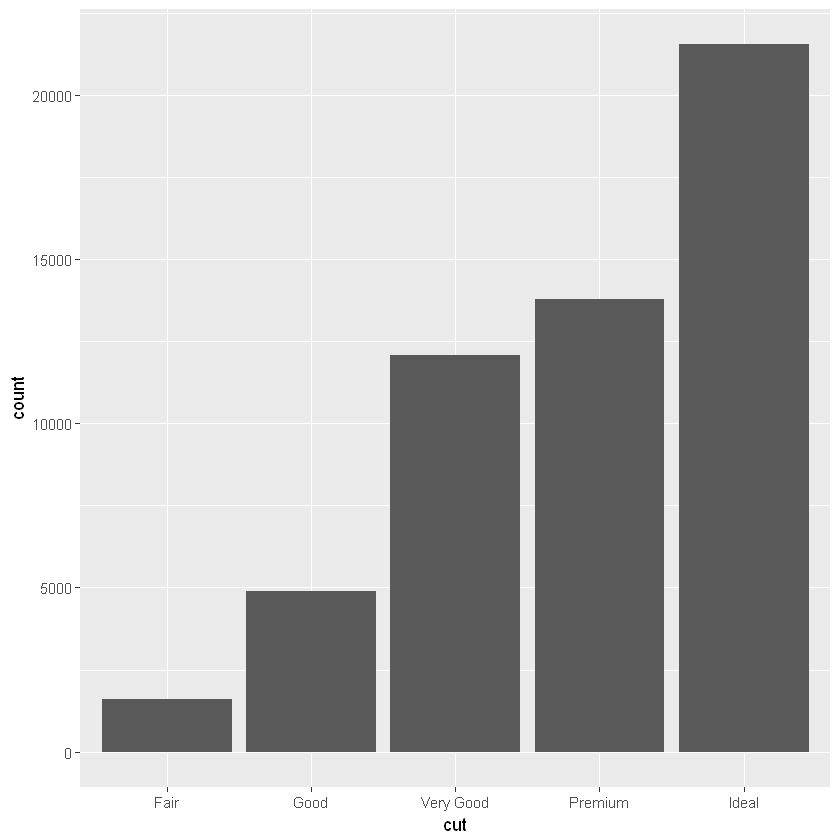

In [114]:
ggplot(data = diamonds) + geom_bar(mapping = aes(x = cut))

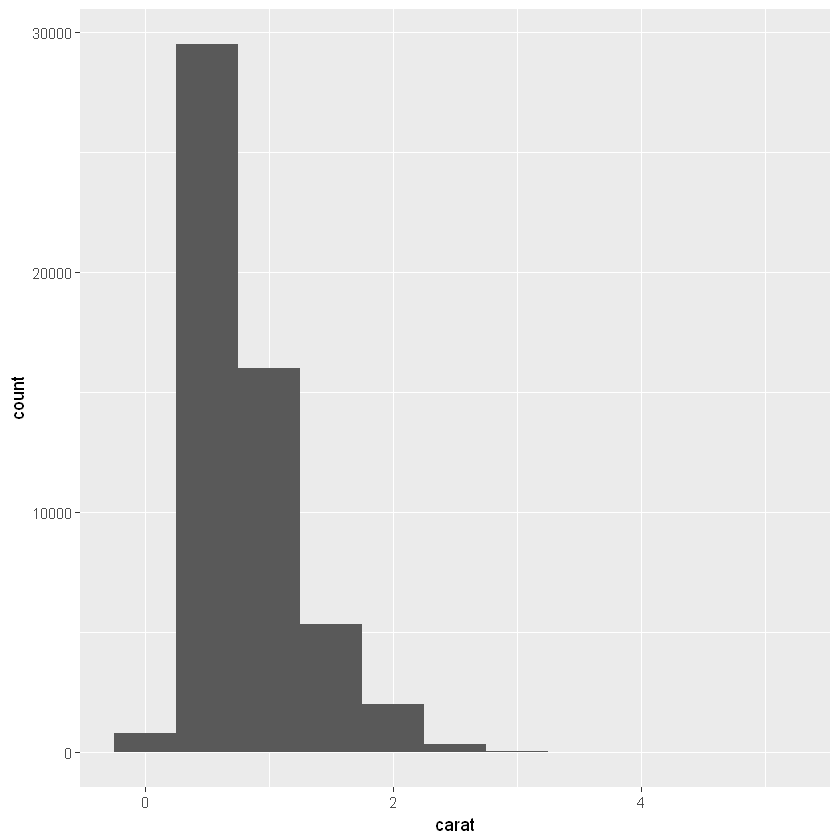

In [115]:
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

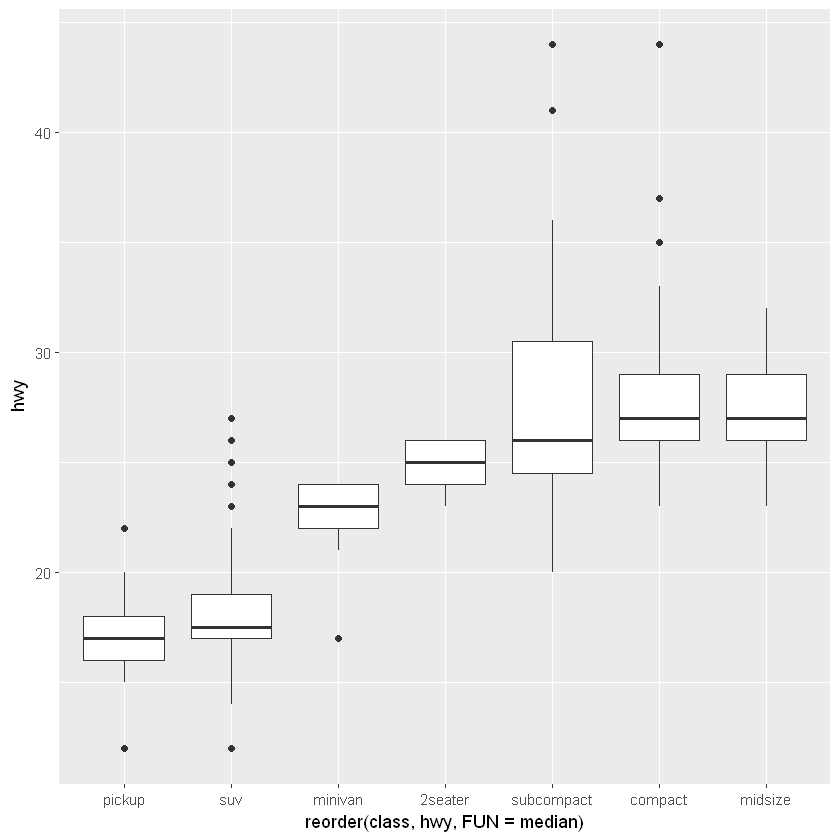

In [116]:
ggplot(data = mpg) + geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy))

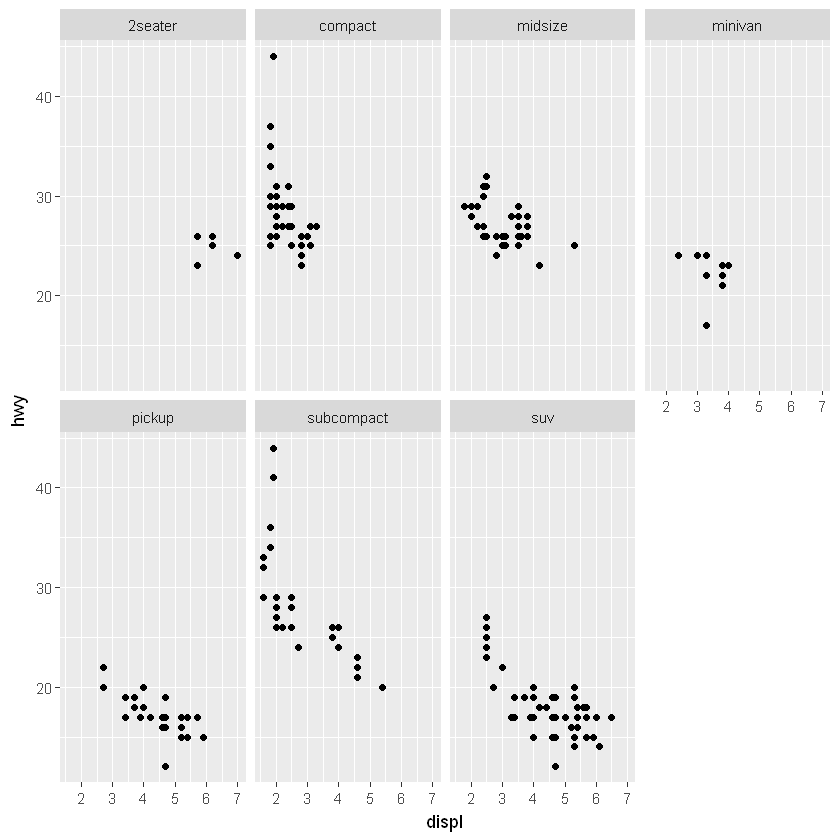

In [117]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy)) + facet_wrap(~ class, nrow = 2)

`geom_smooth()` using method = 'loess'


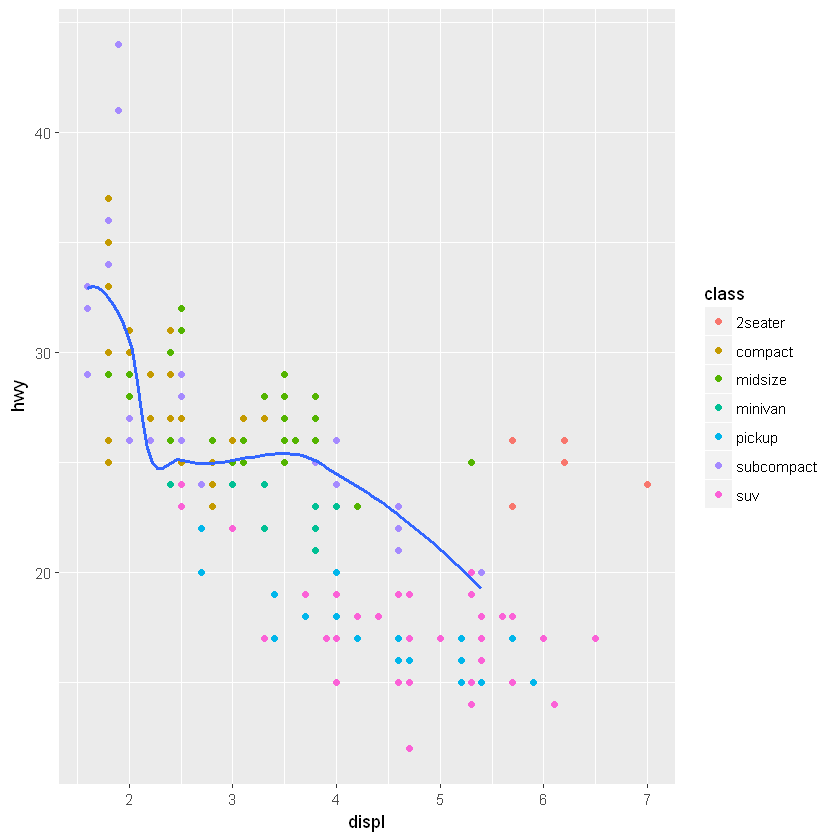

In [118]:
ggplot(data = mpg, 
mapping = aes(x = displ, y = hwy)) + 
geom_point(mapping = aes(color = class)) + 
geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)

# Tibble  

"Tibbles are data.frames that are lazy and surly: they do less and complain more forcing you to confront problems earlier, typically leading to cleaner, more expressive code."  

### Why I Love Tibbles Over Dataframes  

* It never changes the type of the inputs (e.g. it never converts strings to factors!).
* It never changes the names of variables.
* It never creates row names

In [119]:
iris_as_tibble = as_tibble(iris)
print(iris_as_tibble)

# A tibble: 150 x 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl>  <fctr>
 1          5.1         3.5          1.4         0.2  setosa
 2          4.9         3.0          1.4         0.2  setosa
 3          4.7         3.2          1.3         0.2  setosa
 4          4.6         3.1          1.5         0.2  setosa
 5          5.0         3.6          1.4         0.2  setosa
 6          5.4         3.9          1.7         0.4  setosa
 7          4.6         3.4          1.4         0.3  setosa
 8          5.0         3.4          1.5         0.2  setosa
 9          4.4         2.9          1.4         0.2  setosa
10          4.9         3.1          1.5         0.1  setosa
# ... with 140 more rows


Sometimes older code doesn't work with Tibbles. From the book R For Data Science:  

"The main reason that some older functions don't work with tibble is the `[` function.  We don't use `[` much in this book because `dplyr::filter()` and `dplyr::select()` allow you to solve the same problems with clearer code. With base R data frames, `[` sometimes returns a data frame, and sometimes returns a vector. With tibbles, `[` always returns another tibble."

In [120]:
#If you need to work with older code that doesn't work with Tibbles,
#you can coerece Tibbles back to dataframes.
class(as.data.frame(iris_as_tibble)) #show us the type of the object

[1] "data.frame"

# Readr

Turn flat files into data frames  

* `read_csv()` reads comma delimited files, `read_csv2()` reads semicolon
  separated files (common in countries where `,` is used as the decimal place),
  `read_tsv()` reads tab delimited files, and `read_delim()` reads in files
  with any delimiter.

* `read_fwf()` reads fixed width files. You can specify fields either by their
  widths with `fwf_widths()` or their position with `fwf_positions()`.
  `read_table()` reads a common variation of fixed width files where columns
  are separated by white space.

* `read_log()` reads Apache style log files. (But also check out
  [webreadr](https://github.com/Ironholds/webreadr) which is built on top
  of `read_log()` and provides many more helpful tools.)


In [121]:
heights = read_csv("../../Data/heights/heights.csv", na="")

Parsed with column specification:
cols(
  earn = col_double(),
  height = col_double(),
  sex = col_character(),
  ed = col_integer(),
  age = col_integer(),
  race = col_character()
)


### Compared to base R

If you've used R before, you might wonder why we're not using `read.csv()`. There are a few good reasons to favour readr functions over the base equivalents:

* They are typically much faster (~10x) than their base equivalents.
  Long running jobs have a progress bar, so you can see what's happening. 
  If you're looking for raw speed, try `data.table::fread()`. It doesn't fit 
  quite so well into the tidyverse, but it can be quite a bit faster.

* They produce tibbles, they don't convert character vectors to factors,
  use row names, or munge the column names. These are common sources of
  frustration with the base R functions.

* They are more reproducible. Base R functions inherit some behaviour from
  your operating system and environment variables, so import code that works 
  on your computer might not work on someone else's.

In [122]:
write_csv(heights, "../../Data/heights/heights_out.csv") 

If you're just saving to excel to work with it there, use write_excel_csv().

In [123]:
write_excel_csv(heights, "../../Data/heights/heights_out_for_excel.csv") 

You lose type information when you write. To fix you can write it out to RDS (R custom binary format) or use a package called feather to store it in a binary format sharable across applications.

## Other types of data

To get other types of data into R, we recommend starting with the tidyverse packages listed below. They're certainly not perfect, but they are a good place to start. For rectangular data:

* __haven__ reads SPSS, Stata, and SAS files.

* __readxl__ reads excel files (both `.xls` and `.xlsx`).

* __DBI__, along with a database specific backend (e.g. __RMySQL__, 
  __RSQLite__, __RPostgreSQL__ etc) allows you to run SQL queries against a 
  database and return a data frame.

For hierarchical data: use __jsonlite__ (by Jeroen Ooms) for json, and __xml2__ for XML. Jenny Bryan has some excellent worked examples at <https://jennybc.github.io/purrr-tutorial/>.

For other file types, try the [R data import/export manual](https://cran.r-project.org/doc/manuals/r-release/R-data.html) and the [__rio__](https://github.com/leeper/rio) package.